## Portfolio 4: Customer Segmentation Analysis for Supermarket Chain


### Overview

This portfolio presents a customer segmentation analysis for a large supermarket chain using a dataset of 2,000 customers collected through loyalty cards. The analysis aims to deliver clear, actionable insights that are accessible to management, even without technical expertise.

### Workflow:

**1. Introduction**  
- The problem is introduced, and the objective of the report is clearly defined.

**2. Exploratory Data Analysis**
- Conduct a thorough exploratory data analysis (EDA) to examine summary statistics, visualize key features, and uncover underlying patterns.

**3. Customer Segmentation**
- Perform clustering analysis to segment customers into distinct groups.
- Select the optimal number of clusters using various methods discussed in the course.
- Provide clear interpretations of each cluster in terms of customer profiles.
- Apply two different clustering techniques and compare the results.

**4. Recommendations**  
- Offer targeted marketing strategies based on the characteristics of each customer segment.

**5. Conclusion**  
- Summarize the findings and highlight key insights for strategic decision-making.

---
### Exploratory Data Analysis

The key variables in the `Portfolio 4.csv` dataset are as follows:

| Variable        | Data type   | Range                            | Description                                                                                      |
|-----------------|-------------|----------------------------------|--------------------------------------------------------------------------------------------------|
| ID              | Numerical   | Integer                          | Shows a unique identifier of a customer.                                                          |
| Sex             | Categorical | {0, 1}| Biological sex (gender) of a customer.<br>0: Male<br>1: Female                         |                                                                                              |
| Marital status  | Categorical | {0, 1}| Marital status of a customer.<br>0: Single<br>1: Non-single (divorced/separated/married/widowed)                                                                     |
| Age             | Numerical   | Integer| The age of the customer in years (current year - the year of birth of the customer at the time of creation of the dataset).<br>18: Min value (the lowest age observed in the dataset)<br>76: Max value (the highest age observed in the dataset) |
| Education       | Categorical | {0, 1, 2, 3}| Level of education of the customer<br>0: Other/unknown<br>1: High school<br>2: University<br>3: Graduate school                                                                     |
| Income          | Numerical   | Real| Self-reported annual income in US dollars of the customer.<br>35832: Min value (the lowest income observed in the dataset)<br>309364: Max value (the highest income observed in the dataset)                                                                     |
| Occupation      | Categorical | {0, 1, 2}| Category of occupation of the customer.<br>0: Unemployed/unskilled<br>1: Skilled employee/official<br>2: Management/self-employed/highly qualified employee/officer                                                                                  |
| Settlement size | Categorical | {0, 1, 2}| The size of the city that the customer lives in.<br>0: Small city<br>1: Mid-sized city<br>2: Big city|                                                                   

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import textwrap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Read the csv file 
df = pd.read_csv('Data/Portfolio 4.csv')

# Show the number of rows and columns of the dataset
print("Data shape: Rows =", df.shape[0], "; Columns =", df.shape[1])

# Check the first 5 records of the dataset
df.head(5)

Data shape: Rows = 2000 ; Columns = 8


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [43]:
# Display the variable types present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [44]:
# Exhibit the dataframe's statistical summary
df.describe().loc[['mean', 'min', 'max']]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,100001000.5,0.457,0.4965,35.909,1.038,120954.419,0.8105,0.739
min,100000001.0,0.000,0.0000,18.000,0.000,35832.000,0.0000,0.000
max,100002000.0,1.000,1.0000,76.000,3.000,309364.000,2.0000,2.000


### <u>Distribution of Numerical Features</u>

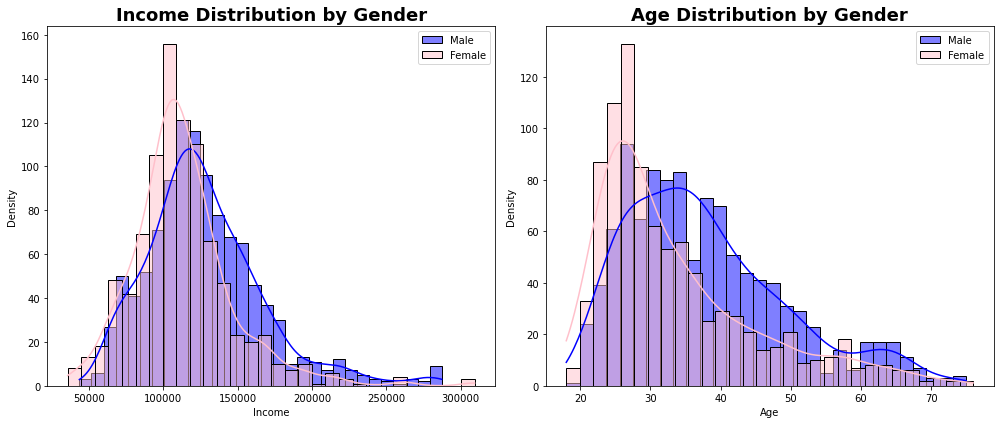

In [45]:
# Distributions of Age and Income by Sex
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mapping of gender codes to labels
gender_mapping = {0: 'Male', 1: 'Female'}

# Variables to plot and their corresponding titles
variables = [('Income', 'Income Distribution by Gender'),
             ('Age', 'Age Distribution by Gender')]

# Iterate over the axes and variables
for ax, (variable, title) in zip(axes, variables):
    # Plot histogram for each gender
    for gender, label in gender_mapping.items():
        # Subset data based on gender
        data = df[df['Sex'] == gender][variable]
        # Plot histogram with KDE
        sns.histplot(data, bins=30, kde=True, color='blue' if gender == 0 else 'pink',
                     label=label, ax=ax)
    # Set title and axis labels
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(variable)
    ax.set_ylabel('Density')
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


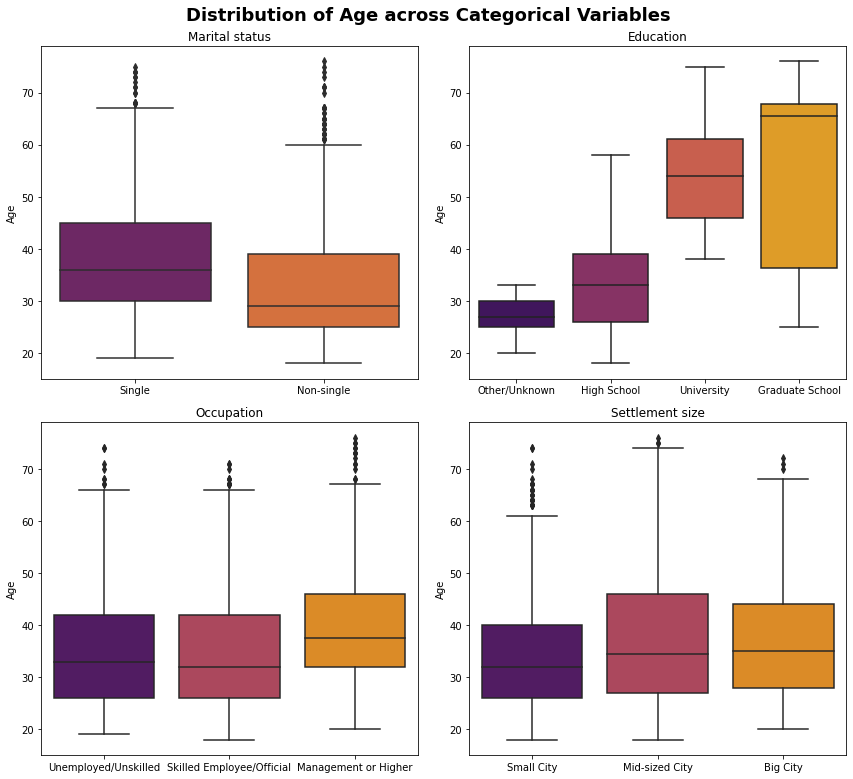

In [46]:
# Define the label mappings for each categorical variable
marital_status_labels = {0: "Single", 1: "Non-single"}
education_labels = {0: "Other/Unknown", 1: "High School", 2: "University", 3: "Graduate School"}
occupation_labels = {0: "Unemployed/Unskilled", 1: "Skilled Employee/Official", 2: "Management or Higher"}
settlement_size_labels = {0: "Small City", 1: "Mid-sized City", 2: "Big City"}

# Create a dictionary to map all categorical attributes
labels_dict = {
    'Marital status': marital_status_labels,
    'Education': education_labels,
    'Occupation': occupation_labels,
    'Settlement size': settlement_size_labels
}

# Distribution of Age across other segments
attributes = ['Marital status', 'Education', 'Occupation', 'Settlement size']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 11))

# Iterate over the attributes
for i, attribute in enumerate(attributes):
    # Determine the row and column indices for the subplot
    row = i // 2
    col = i % 2
    
    # Plot a boxplot of Age against the current attribute
    sns.boxplot(x=attribute, y='Age', data=df, ax=axes[row, col], palette='inferno')
    
    # Set the title, x-axis label, and y-axis label for the subplot
    axes[row, col].set_title(attribute)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Age')

    # Replace numerical labels with actual names using the dictionary
    axes[row, col].set_xticklabels([labels_dict[attribute][x] for x in axes[row, col].get_xticks()])

# Set the overall title for the figure
plt.suptitle('Distribution of Age across Categorical Variables', fontsize=18, fontweight='bold')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

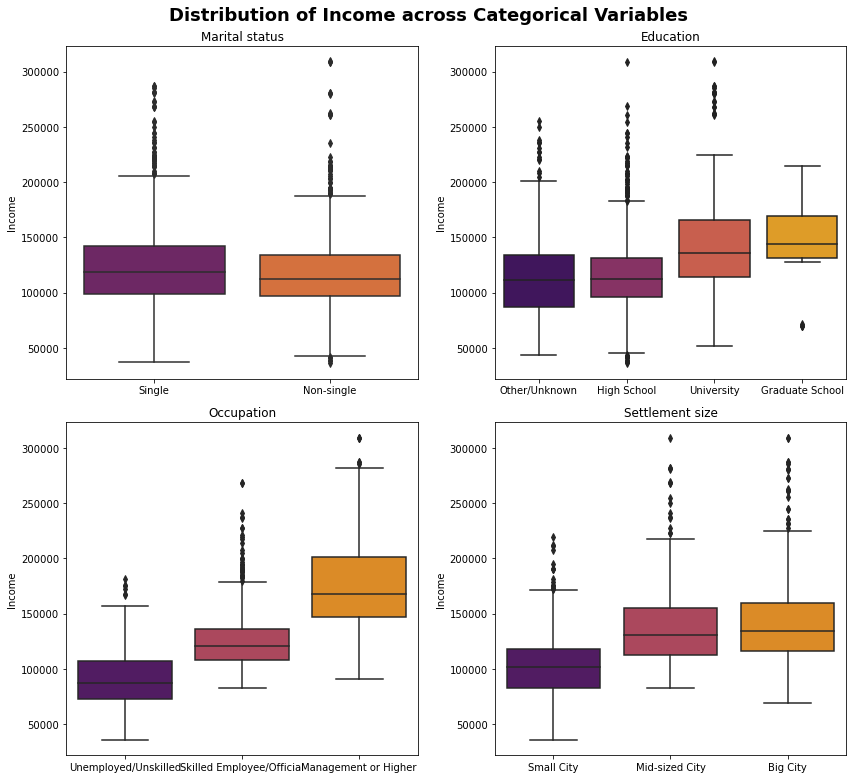

In [47]:
# Distribution of Income across other segments
fig, axes = plt.subplots(2, 2, figsize=(12, 11))

# Iterate over the attributes
for i, attribute in enumerate(attributes):
    # Determine the row and column indices for the subplot
    row = i // 2
    col = i % 2
    
    # Plot a boxplot of Income against the current attribute
    sns.boxplot(x=attribute, y='Income', data=df, ax=axes[row, col], palette='inferno')
    
    # Set the title, x-axis label, and y-axis label for the subplot
    axes[row, col].set_title(attribute)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Income')

    # Replace numerical labels with actual names using the dictionary
    axes[row, col].set_xticklabels([labels_dict[attribute][x] for x in axes[row, col].get_xticks()], rotation=0)

# Set the overall title for the figure
plt.suptitle('Distribution of Income across Categorical Variables', fontsize=18, fontweight='bold')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### <u>Distribution of Categorical Features</u>

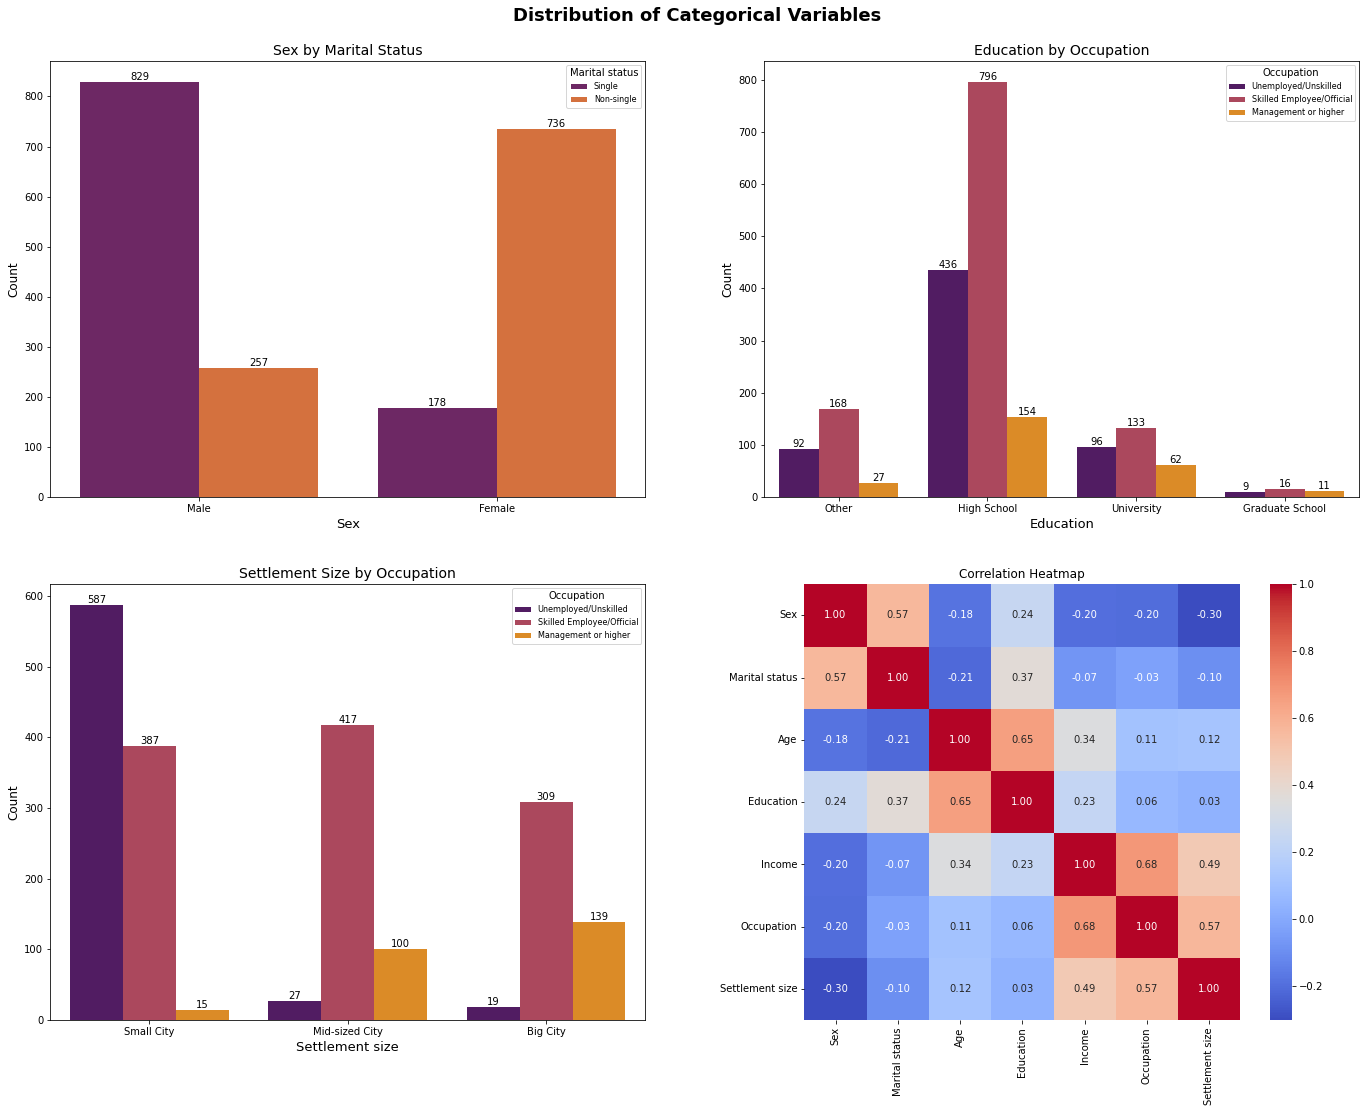

In [48]:
# Define a function to plot countplots
def plot_countplot(data, x, hue, hue_labels, x_labels, title, ax):
    # Plot the countplot
    sns.countplot(x=x, hue=hue, data=data, palette='inferno', ax=ax)

    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

    # Set the title, x-axis label, y-axis label, legend, and x-axis tick labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title=hue, loc='upper right', labels=hue_labels.values(), fontsize=8)
    ax.set_xticklabels(x_labels.values())

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Create labels for countplot categories
sex_labels = {0: "Male", 1: "Female"}
marital_labels = {0: "Single", 1: "Non-single"}
education_labels = {0: "Other", 1: "High School", 2: "University", 3: "Graduate School"}
occupation_labels = {0: "Unemployed/Unskilled", 1: "Skilled Employee/Official", 2: "Management or higher"}
settlement_size_labels = {0: "Small City", 1: "Mid-sized City", 2: "Big City"}

# Plot Sex by Marital Status
plot_countplot(df, x='Sex', hue='Marital status', hue_labels=marital_labels,
               x_labels=sex_labels, title='Sex by Marital Status', ax=axes[0, 0])

# Plot Education by Occupation
plot_countplot(df, x='Education', hue='Occupation', hue_labels=occupation_labels,
               x_labels=education_labels, title='Education by Occupation', ax=axes[0, 1])

# Plot Settlement Size by Occupation
plot_countplot(df, x='Settlement size', hue='Occupation', hue_labels=occupation_labels,
               x_labels=settlement_size_labels, title='Settlement Size by Occupation', ax=axes[1,0])

# Define the columns to include in the correlation heatmap
columns = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

# Generate the correlation heatmap
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

# Set the overall title for the figure
plt.suptitle('Distribution of Categorical Variables', fontsize=18, fontweight='bold', x=0.5, y=1)

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Show the plot
plt.show()

---
### Customer Segmentation 

In [49]:
# Exclude 'ID' as it is does not provide meaningful information 
df_new = df.drop('ID', axis=1)

# Standardize the variables
scaler = StandardScaler()
df_std = scaler.fit_transform(df_new)

---
### Hierarchical Clustering 

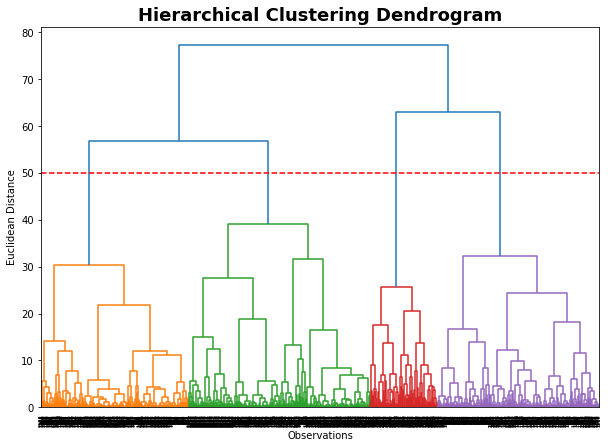

In [50]:
# Construct the dendrogram
hier_clust = linkage(df_std, metric = "euclidean", method = "ward")
plt.figure(figsize= (10, 7))
plt.title("Hierarchical Clustering Dendrogram", fontsize=18, loc='center', fontweight='bold')
plt.xlabel("Observations")
plt.ylabel("Euclidean Distance")
dendrogram(hier_clust)

# Plot a cutoff line
plt.axhline(y=50, color='r', linestyle='--')

# Display the plot
plt.show()

In [51]:
# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_new['Hierarchical_Cluster'] = hc.fit_predict(df_std)

# Hierarchical cluster labelling
HR_labels = {
    0: "Unemployed Single Women in Small Towns", 
    1: "Career-Oriented Males in Metropolitan Areas",
    2: "Transitional Mid-Career City Dwellers",
    3: "Young Urban Skilled Workers"
}

# Compute the aggregated statistics for each cluster:
# - Use mean for 'Income' since it's a continuous variable.
# - Use median for 'Age' as it's right-skewed to better represents the central tendency.
# - Use mode for categorical features as it captures the most frequent value.
df_hc_analysis = df_new.groupby('Hierarchical_Cluster').agg(
    {'Income': lambda x: round(x.mean(), 2),  
     'Age': 'median',
     'Sex': lambda x: x.mode()[0],  
     'Marital status': lambda x: x.mode()[0],  
     'Education': lambda x: x.mode()[0],  
     'Occupation': lambda x: x.mode()[0],  
     'Settlement size': lambda x: x.mode()[0]}  
)

# Replace numerical clustering with predetermined labels 
df_hc_analysis.rename(index=HR_labels, inplace=True)

# Display the analysis results
df_hc_analysis

,Income,Age,Sex,Marital status,Education,Occupation,Settlement size
Hierarchical_Cluster,,,,,,,
Unemployed Single Women in Small Towns,90807.33,33.0,1,0,1,0,0
Career-Oriented Males in Metropolitan Areas,137369.34,36.0,0,0,1,1,2
Transitional Mid-Career City Dwellers,163924.68,57.0,0,1,2,1,1
Young Urban Skilled Workers,120399.59,27.0,1,1,1,1,0


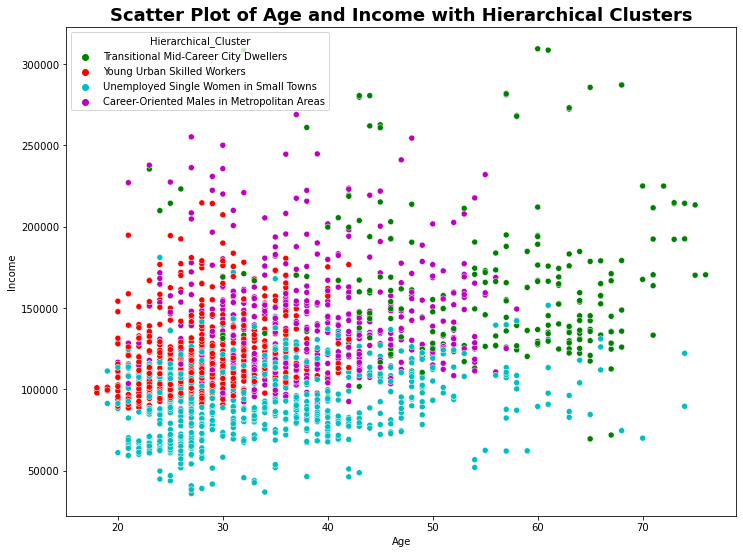

In [52]:
# Replace numerical cluster labels with cluster names
df_new['Hierarchical_Cluster'] = df_new['Hierarchical_Cluster'].map(HR_labels)

# Scatterplot of Age and Income based on Hierarchical Clustering
x_axis = df_new["Age"]
y_axis = df_new["Income"]

# Create a figure and set its size
plt.figure(figsize=(12, 9))

# Set the title of the scatter plot
plt.title('Scatter Plot of Age and Income with Hierarchical Clusters', fontsize=18, fontweight='bold')

# Create a scatter plot 
sns.scatterplot(x=x_axis, y=y_axis, hue=df_new['Hierarchical_Cluster'], palette=["g", "r", "c", "m"])

# Display the scatter plot
plt.show()

---
### K-Means Clustering

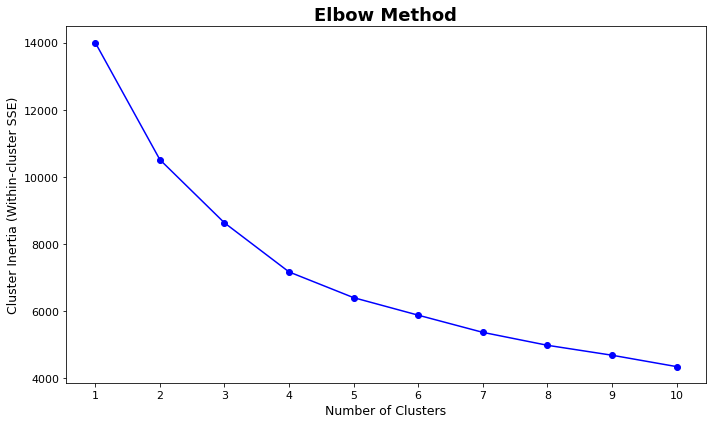

In [53]:
# Determine the optimal number of clusters using the Elbow Method
inertias = []

# Iterate over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Create a KMeans model with current number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(df_std)
    
    # Append the inertia (within-cluster sum of squares) to the list
    inertias.append(km.inertia_)
    
    # Print the number of clusters and the cluster inertia
    # print(f'Clusters {i}, Inertia: {km.inertia_}')

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o', color='blue')
plt.xlabel('Number of Clusters', fontsize=12.5)
plt.ylabel('Cluster Inertia (Within-cluster SSE)', fontsize=12.5)
plt.xticks(range(1, 11), fontsize=11)
plt.yticks(fontsize=11)
plt.title('Elbow Method',fontsize=18, fontweight='bold')
plt.tight_layout()

# Display the plot
plt.show()

In [54]:
# Initiate K-Means with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(df_std)

# Create a new column with the predicted clusters for each observation 
df_new['KMeans_Cluster'] = clusters

# K-Means cluster labelling
KM_labels = {
    0: "Young Career Starter Women", 
    1: "Limited Opportunity Working-Class Males",
    2: "Skilled Single Urban Professionals Males",
    3: "High-Achieving Established Professionals"
}

# Use mode for categorical features and mean for the 'Income' feature
df_km_analysis = df_new.groupby('KMeans_Cluster').agg(
    {
     'Income': lambda x: round(x.mean(), 2),
     'Age': 'median', 
     'Sex': lambda x: x.mode()[0],  
     'Marital status': lambda x: x.mode()[0], 
     'Education': lambda x: x.mode()[0],  
     'Occupation': lambda x: x.mode()[0],  
     'Settlement size': lambda x: x.mode()[0]} 
)
# Replace numerical clustering with predetermined labels 
df_km_analysis.rename(index=KM_labels, inplace=True)

# Exclude the unwanted columns
df_km_analysis = df_km_analysis.loc[:, ~df_km_analysis.columns.isin(["Hierarchical_Cluster"])]

# Display the analysis results
df_km_analysis

,Income,Age,Sex,Marital status,Education,Occupation,Settlement size
KMeans_Cluster,,,,,,,
Young Career Starter Women,105759.12,27.0,1,1,1,1,0
Limited Opportunity Working-Class Males,97859.85,35.0,0,0,1,0,0
Skilled Single Urban Professionals Males,141218.25,35.0,0,0,1,1,2
High-Achieving Established Professionals,158338.42,57.0,1,1,2,1,1


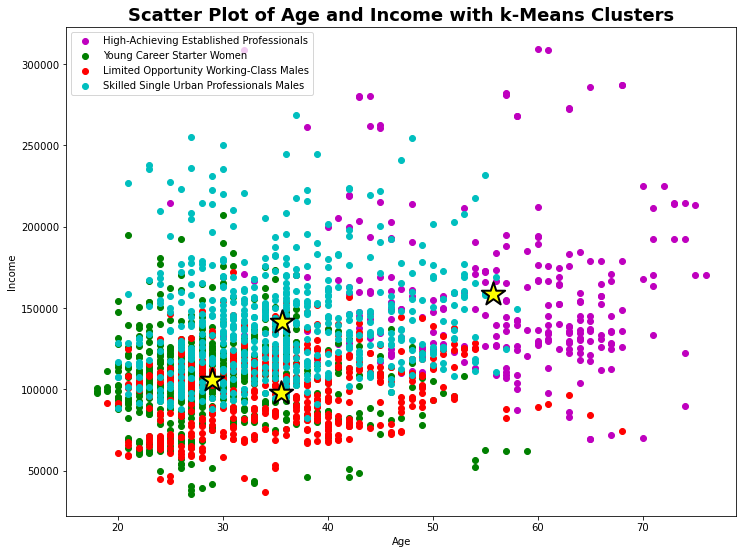

In [55]:
# Compute centroids
centroids = df_new.groupby('KMeans_Cluster').mean()

# Scatterplot of Age and Income with K-Means Clustering
plt.figure(figsize=(12, 9))

# Define color map and cluster names
colors = {0:'g', 1:'r', 2:'c', 3: 'm'}
cluster_names = {0: 'Young Career Starter Women', 1: 'Limited Opportunity Working-Class Males', 2: 'Skilled Single Urban Professionals Males', 3: 'High-Achieving Established Professionals'}
centroid_colors = {0:'yellow', 1:'yellow', 2:'yellow', 3: 'yellow'}

# Create scatter plot
for cluster in df_new['KMeans_Cluster'].unique():
    plt.scatter(df_new[df_new['KMeans_Cluster']==cluster]['Age'], 
                df_new[df_new['KMeans_Cluster']==cluster]['Income'], 
                c=colors[cluster],
                label=cluster_names[cluster])

# Add centroids to the plot
for cluster in centroids.index:
    plt.scatter(centroids.loc[cluster, 'Age'], 
                centroids.loc[cluster, 'Income'], 
                c=centroid_colors[cluster], 
                marker='*', 
                s=600, 
                edgecolor='black', 
                linewidths=2)

# Set the plot title, axis labels, and legened
plt.title('Scatter Plot of Age and Income with k-Means Clusters',fontsize=18, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

# Display the scatter plot
plt.show()

In [56]:
# Replace cluster labels in original data
df_new['KMeans_Cluster']=df_new['KMeans_Cluster'].map(KM_labels)

---
### K-Means vs. Hierarchical Clustering

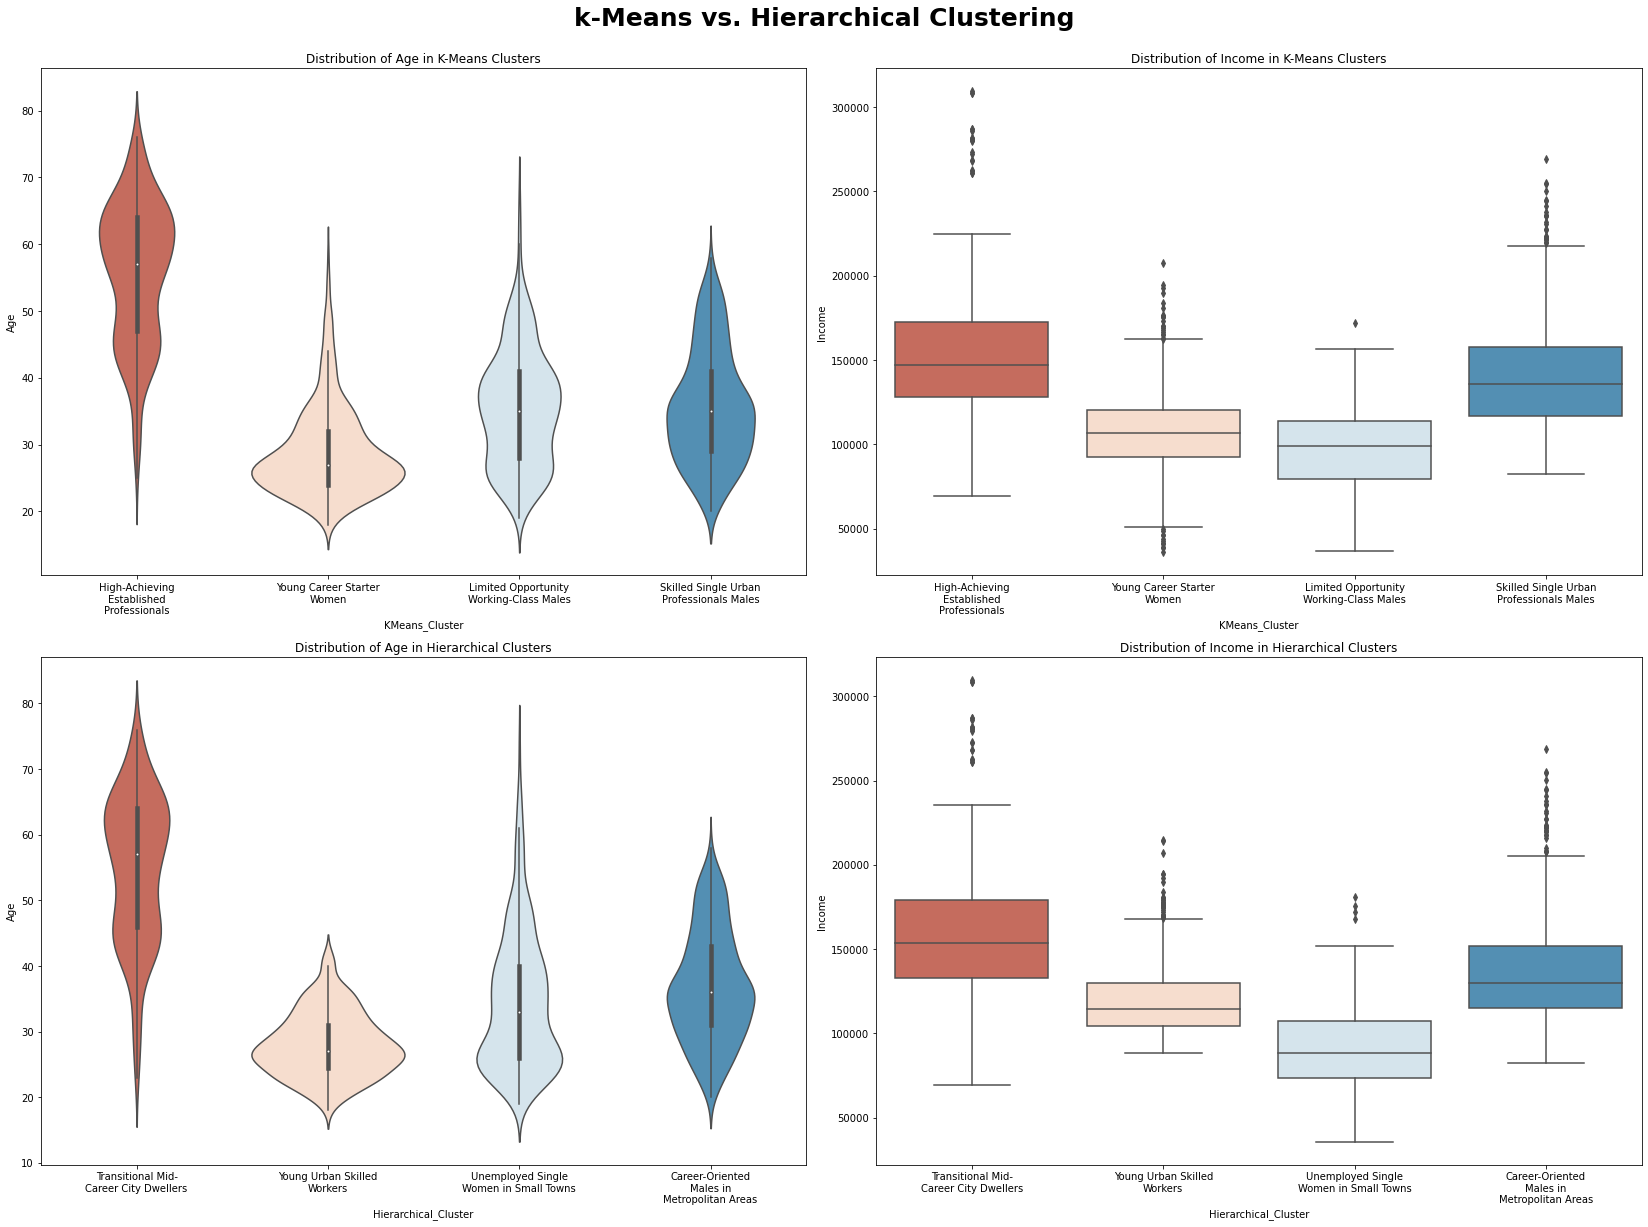

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(23, 17))

# K-Means clustering
sns.violinplot(ax=axes[0, 0], x='KMeans_Cluster', y='Age', palette='RdBu', data=df_new)
sns.boxplot(ax=axes[0, 1], x='KMeans_Cluster', y='Income', palette='RdBu', data=df_new)

# Hierarchical clustering
sns.violinplot(ax=axes[1, 0], x='Hierarchical_Cluster', y='Age', palette='RdBu', data=df_new)
sns.boxplot(ax=axes[1, 1], x='Hierarchical_Cluster', y='Income', palette='RdBu', data=df_new)

# Set titles for each subplots
axes[0, 0].set_title('Distribution of Age in K-Means Clusters')
axes[0, 1].set_title('Distribution of Income in K-Means Clusters')
axes[1, 0].set_title('Distribution of Age in Hierarchical Clusters')
axes[1, 1].set_title('Distribution of Income in Hierarchical Clusters')

# Set x-axis labels with line breaks
for ax_row in axes:
    for ax in ax_row:
        xtick_labels = ax.get_xticklabels()
        xtick_labels = [textwrap.fill(label.get_text(), width=20) for label in xtick_labels]
        ax.set_xticklabels(xtick_labels)

# Set the overall title for the figure
plt.suptitle('k-Means vs. Hierarchical Clustering', fontsize=25, fontweight='bold', x=0.5, y=1)

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()